In [14]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import math
import seaborn as sns


In [5]:
os.getcwd()

'/Users/yasmine/Library/CloudStorage/OneDrive-ETHZurich/25_HS/Prakti/chikungunya/scripts'

In [6]:
filepath = "../data/ingest/subsampled_data/metadata.tsv"
df = pd.read_csv(filepath, sep="\t")

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   accession              187 non-null    object 
 1   genbank_accession_rev  187 non-null    object 
 2   strain                 187 non-null    object 
 3   date                   187 non-null    object 
 4   region                 185 non-null    object 
 5   country                185 non-null    object 
 6   division               77 non-null     object 
 7   location               29 non-null     object 
 8   host                   180 non-null    object 
 9   date_submitted         187 non-null    object 
 10  sra_accession          3 non-null      object 
 11  abbr_authors           187 non-null    object 
 12  authors                187 non-null    object 
 13  institution            187 non-null    object 
 14  clade                  185 non-null    object 
 15  qc.ove

In [10]:
df.head()

,accession,genbank_accession_rev,strain,date,region,country,division,location,host,date_submitted,...,clade,qc.overallScore,qc.overallStatus,alignmentScore,alignmentStart,alignmentEnd,genome_coverage,subtypes,F_coverage,G_coverage
0,KY680389,KY680389.1,CHIKV/Homo sapiens/USA/CKVHL_59/2015,2015-07-14,North America,USA,Osceola County,NaN,Homo sapiens,2017-04-01,...,III-Asian,0.0,good,32452.0,28.0,11826.0,0.997717,NaN,1.0,1.0
1,KY703917,KY703917.1,CHIKV/Homo sapiens/NIC/14-16/2015,2016-01-08,North America,Nicaragua,Esteli,NaN,Homo sapiens,2017-04-01,...,III-Asian,0.0,good,31274.0,28.0,11346.0,0.957128,NaN,1.0,1.0
2,LC259083,LC259083.1,CHIKV/Hu/Indonesia/NIID58/2009,2009-09-11,Asia,Indonesia,NaN,NaN,Homo sapiens,2017-12-22,...,III-Asian,0.0,good,32666.0,1.0,11818.0,0.999239,NaN,1.0,1.0
3,LC259085,LC259085.1,CHIKV/Hu/Indonesia/NIID181/2012,2012-10-15,Asia,Indonesia,NaN,NaN,Homo sapiens,2017-12-22,...,III-Asian,0.0,good,32472.0,1.0,11818.0,0.999324,NaN,1.0,1.0
4,LC259088,LC259088.1,CHIKV/Hu/Tonga/NIID41/2014,2014-03-25,Oceania,Tonga,NaN,NaN,Homo sapiens,2017-12-22,...,III-Asian,0.0,good,32488.0,1.0,11818.0,0.999324,NaN,1.0,1.0


In [11]:
df.describe()

,qc.overallScore,alignmentScore,alignmentStart,alignmentEnd,genome_coverage,subtypes,F_coverage,G_coverage
count,185.000000,185.000000,185.000000,185.000000,185.000000,0.0,185.000000,185.000000
mean,2.511082,19251.037838,3748.794595,10632.210811,0.579928,NaN,0.556977,0.557343
std,11.488220,14823.090697,4712.526233,2634.144937,0.443452,NaN,0.497878,0.497521
min,0.000000,528.000000,1.000000,517.000000,0.015559,NaN,0.000000,0.000000
25%,0.000000,3018.000000,21.000000,11119.000000,0.096398,NaN,0.000000,0.000000
50%,0.000000,30938.000000,121.000000,11313.000000,0.938864,NaN,1.000000,1.000000
75%,0.000000,32595.000000,9994.000000,11772.000000,0.991967,NaN,1.000000,1.000000
max,56.250000,35123.000000,10604.000000,11826.000000,1.000000,NaN,1.000000,1.000000


In [12]:
df.describe(include='object')

,accession,genbank_accession_rev,strain,date,region,country,division,location,host,date_submitted,sra_accession,abbr_authors,authors,institution,clade,qc.overallStatus
count,187,187,187,187,185,185,77,29,180,187,3,187,187,187,185,185
unique,187,187,182,169,6,55,55,21,7,103,3,98,107,95,3,2
top,KY680389,KY680389.1,ArB6445,2014-06-16,Asia,India,Tangerang,Banten,Homo sapiens,2014-03-03,ERR14869398,Nakayama et al.,"Desdouits,M.,Kamgang,B.,Berthet,N.,Tricou,V.,N...","Institut Louis Malarde, Unit of Emerging Infec...",II-ECSA,good
freq,1,1,2,5,78,19,6,6,165,8,1,9,8,8,117,177


In [15]:
sns.set_theme(style="whitegrid")
plt.rcParams.update({"figure.figsize": (10, 6)})


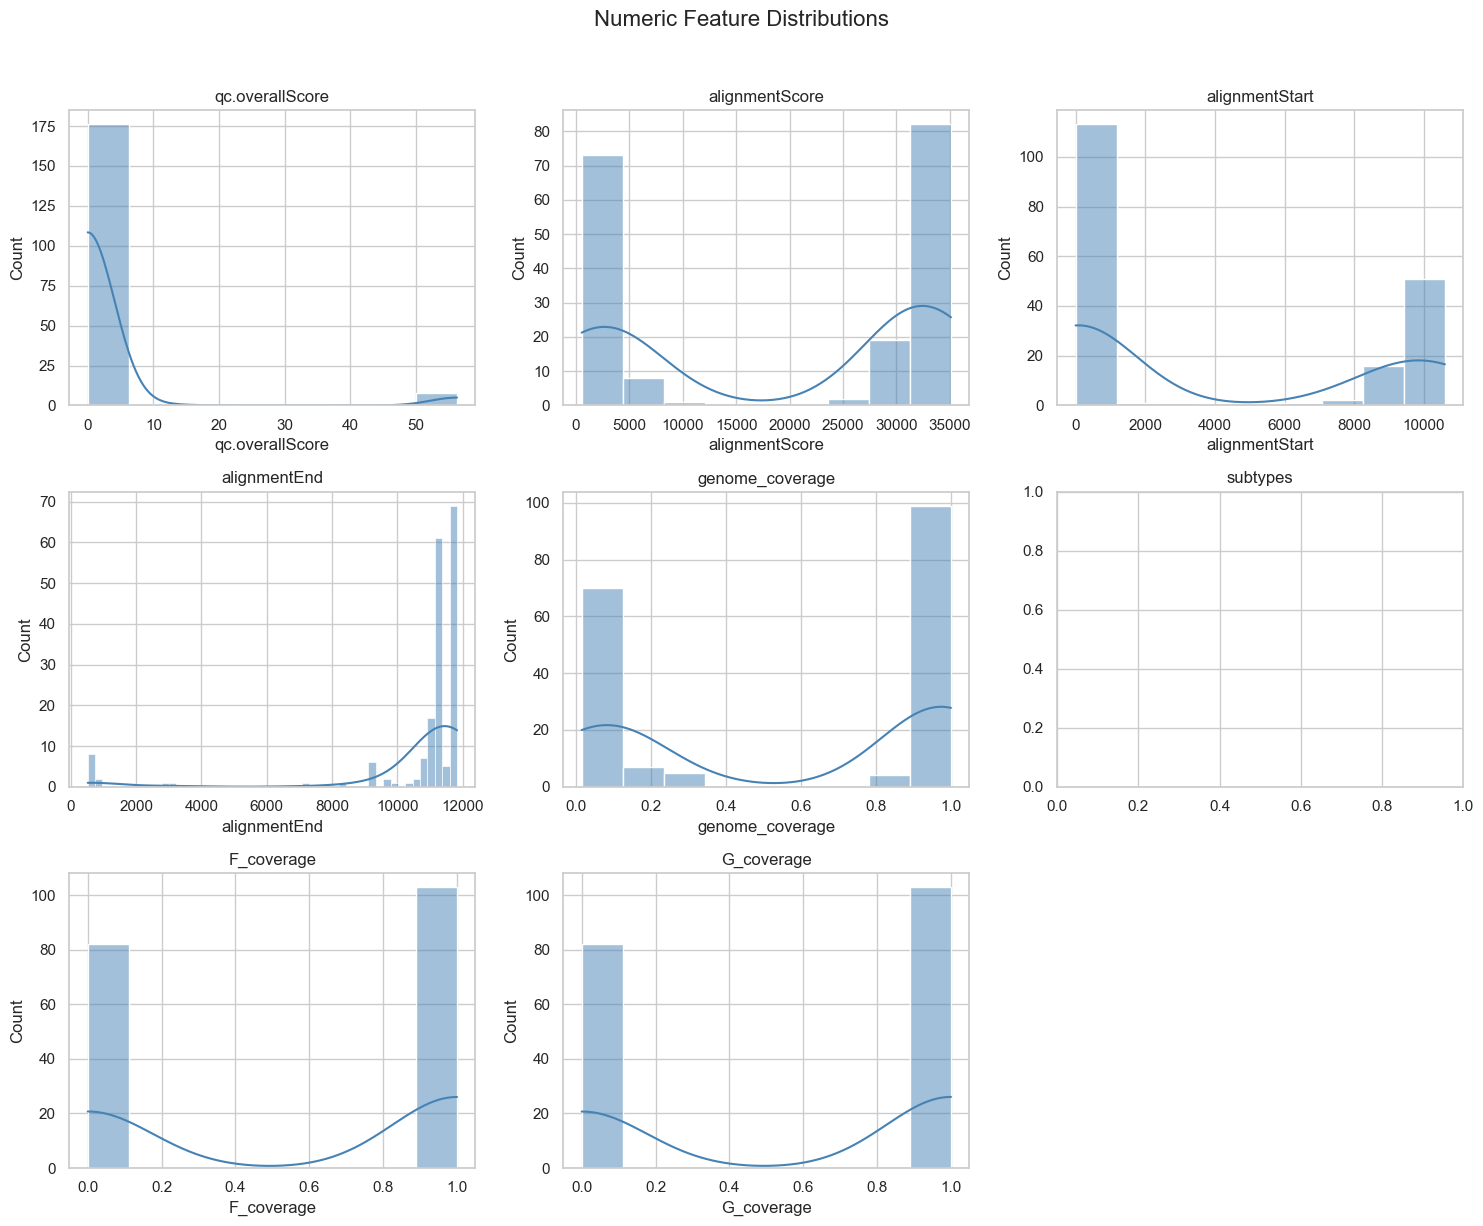

In [16]:
numeric_cols = df.select_dtypes(include="number").columns.tolist()
if numeric_cols:
    n_cols = min(3, len(numeric_cols))
    n_rows = math.ceil(len(numeric_cols) / n_cols)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows), squeeze=False)
    axes = axes.flatten()
    for ax, col in zip(axes, numeric_cols):
        sns.histplot(df[col].dropna(), ax=ax, kde=True, color="steelblue")
        ax.set_title(col)
    for ax in axes[len(numeric_cols):]:
        ax.set_visible(False)
    fig.suptitle("Numeric Feature Distributions", fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()
else:
    print("No numeric columns found.")


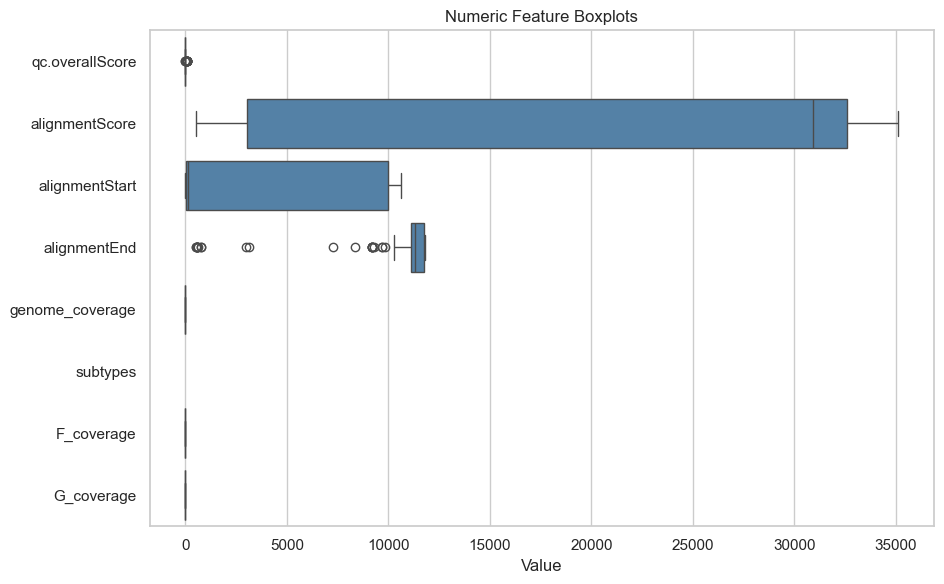

In [17]:
numeric_cols = df.select_dtypes(include="number").columns.tolist()
if numeric_cols:
    melted = df[numeric_cols].melt(var_name="variable", value_name="value")
    plt.figure(figsize=(max(6, len(numeric_cols) * 1.2), 6))
    sns.boxplot(data=melted, x="value", y="variable", orient="h", color="steelblue")
    plt.title("Numeric Feature Boxplots")
    plt.xlabel("Value")
    plt.ylabel("")
    plt.tight_layout()
    plt.show()
else:
    print("No numeric columns found.")


['accession', 'genbank_accession_rev', 'strain', 'date', 'region', 'country', 'division', 'location', 'host', 'date_submitted', 'sra_accession', 'abbr_authors', 'authors', 'institution', 'clade', 'qc.overallStatus']
  accession  count
0  KY680389      1
1  HM045786      1
2  AB908054      1
3  DQ489787      1
4  DQ489788      1


/var/folders/w0/pzdl0rq53pd7lqhw_k66lsv80000gn/T/ipykernel_82022/699295827.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=value_counts, x=col, y="count", palette="viridis")


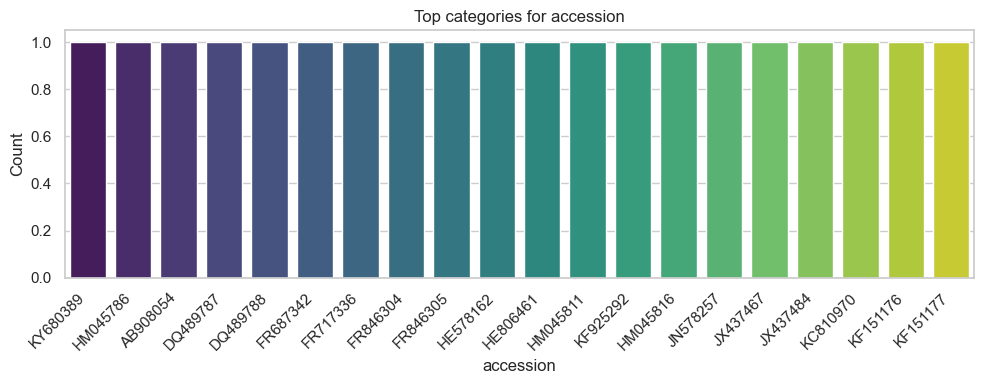

  genbank_accession_rev  count
0            KY680389.1      1
1            HM045786.1      1
2            AB908054.1      1
3            DQ489787.1      1
4            DQ489788.1      1


/var/folders/w0/pzdl0rq53pd7lqhw_k66lsv80000gn/T/ipykernel_82022/699295827.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=value_counts, x=col, y="count", palette="viridis")


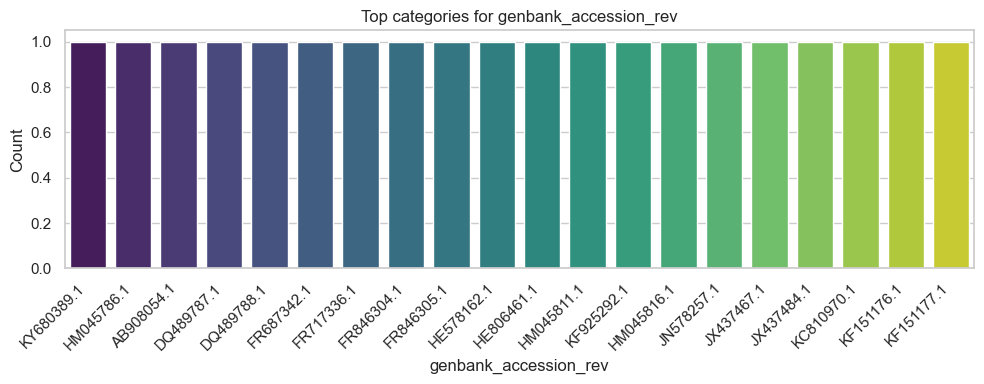

                     strain  count
0                   ArB6445      2
1               NC/2011-568      2
2      Fiji2015-250315-0815      2
3  Prince of Wales Hospital      2
4                  ArB16753      2


/var/folders/w0/pzdl0rq53pd7lqhw_k66lsv80000gn/T/ipykernel_82022/699295827.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=value_counts, x=col, y="count", palette="viridis")


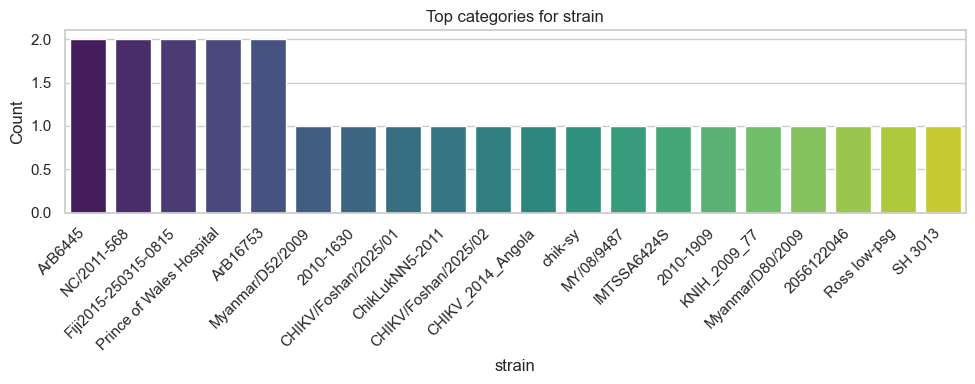

         date  count
0  2014-06-16      5
1  2018-03-27      3
2  1980-11-18      2
3  2019-09-03      2
4  2009-08-09      2


/var/folders/w0/pzdl0rq53pd7lqhw_k66lsv80000gn/T/ipykernel_82022/699295827.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=value_counts, x=col, y="count", palette="viridis")


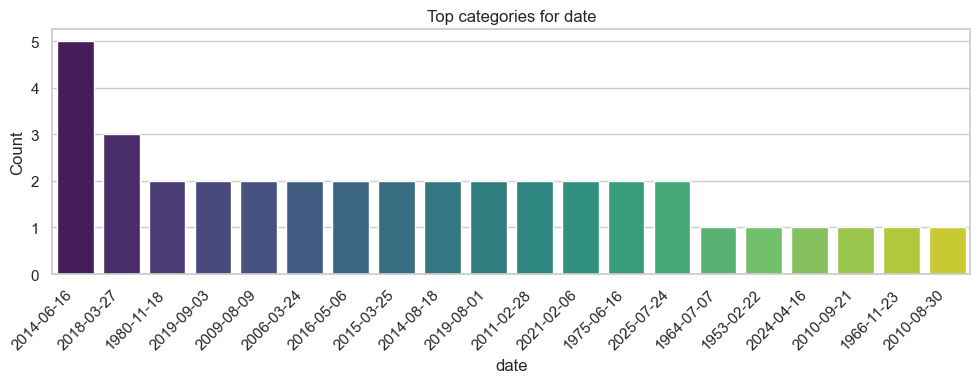

          region  count
0           Asia     78
1  South America     36
2         Africa     30
3         Europe     16
4  North America     15


/var/folders/w0/pzdl0rq53pd7lqhw_k66lsv80000gn/T/ipykernel_82022/699295827.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=value_counts, x=col, y="count", palette="viridis")


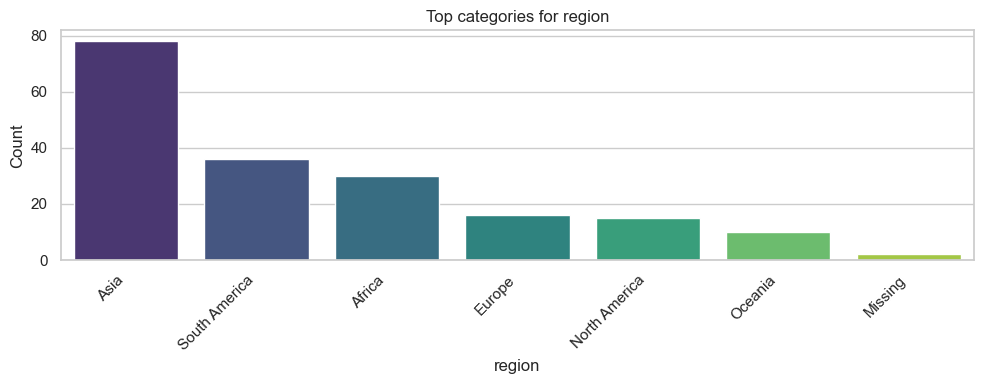

     country  count
0      India     19
1   Thailand     13
2     Brazil     13
3     France     11
4  Indonesia     10


/var/folders/w0/pzdl0rq53pd7lqhw_k66lsv80000gn/T/ipykernel_82022/699295827.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=value_counts, x=col, y="count", palette="viridis")


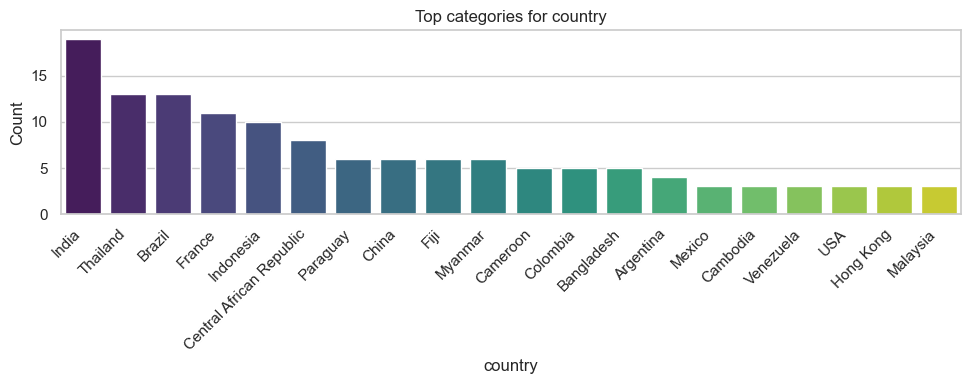

    division  count
0    Missing    110
1  Tangerang      6
2    Réunion      3
3       Suva      3
4  São Paulo      3


/var/folders/w0/pzdl0rq53pd7lqhw_k66lsv80000gn/T/ipykernel_82022/699295827.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=value_counts, x=col, y="count", palette="viridis")


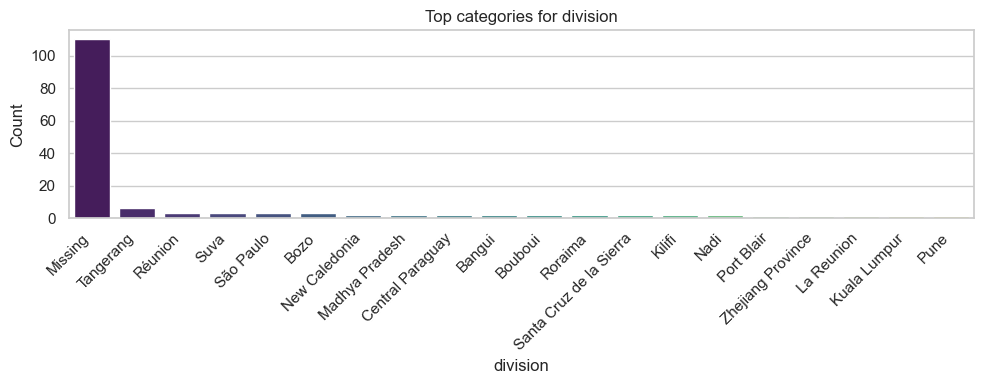

  location  count
0  Missing    158
1   Banten      6
2   Kerala      2
3  Guarujá      2
4    Bahia      2


/var/folders/w0/pzdl0rq53pd7lqhw_k66lsv80000gn/T/ipykernel_82022/699295827.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=value_counts, x=col, y="count", palette="viridis")


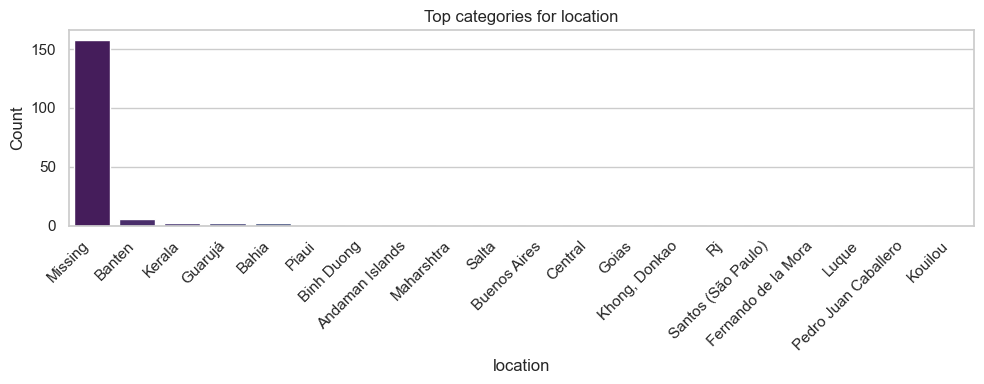

                     host  count
0            Homo sapiens    165
1                 Missing      7
2           Aedes aegypti      5
3              Aedes opok      3
4  Culex quinquefasciatus      2


/var/folders/w0/pzdl0rq53pd7lqhw_k66lsv80000gn/T/ipykernel_82022/699295827.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=value_counts, x=col, y="count", palette="viridis")


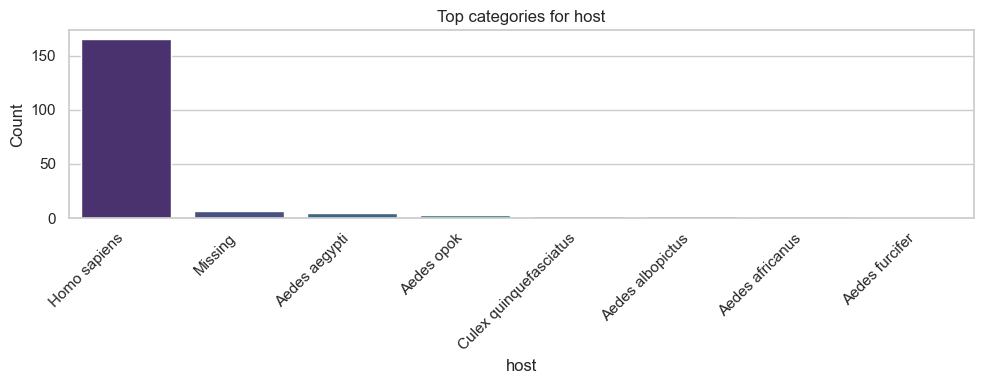

  date_submitted  count
0     2014-03-03      8
1     2017-12-22      7
2     2017-05-23      6
3     2025-07-14      6
4     2019-03-16      5


/var/folders/w0/pzdl0rq53pd7lqhw_k66lsv80000gn/T/ipykernel_82022/699295827.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=value_counts, x=col, y="count", palette="viridis")


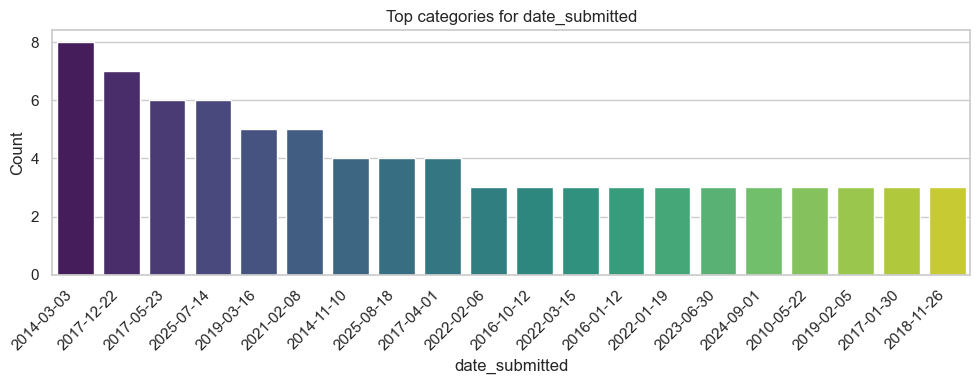

  sra_accession  count
0       Missing    184
1   ERR14869398      1
2    SRR3086330      1
3    SRR3086409      1


/var/folders/w0/pzdl0rq53pd7lqhw_k66lsv80000gn/T/ipykernel_82022/699295827.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=value_counts, x=col, y="count", palette="viridis")


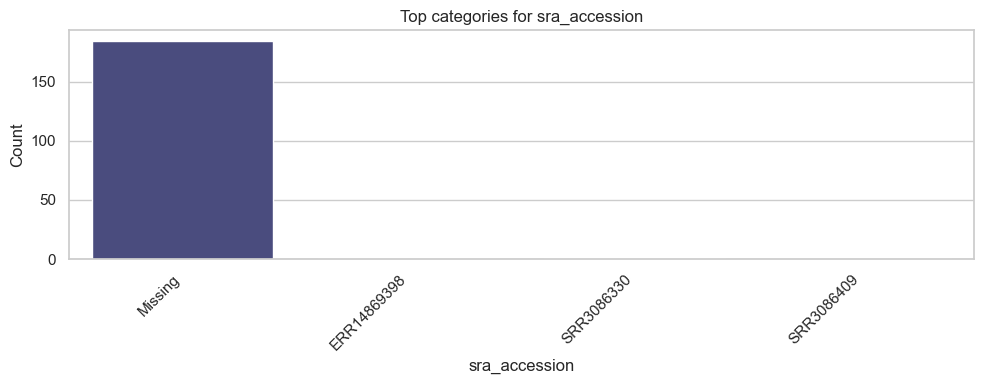

       abbr_authors  count
0   Nakayama et al.      9
1  Desdouits et al.      8
2    Sahadeo et al.      7
3       Jaya et al.      6
4   Teissier et al.      5


/var/folders/w0/pzdl0rq53pd7lqhw_k66lsv80000gn/T/ipykernel_82022/699295827.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=value_counts, x=col, y="count", palette="viridis")


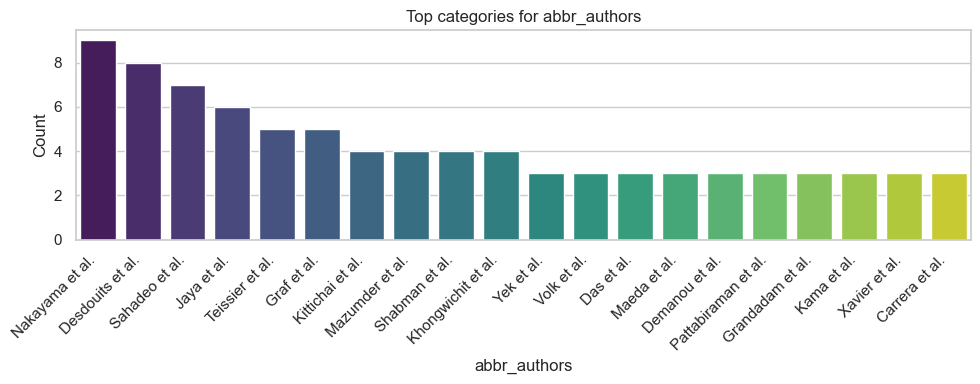

                                             authors  count
0  Desdouits,M.,Kamgang,B.,Berthet,N.,Tricou,V.,N...      8
1  Nakayama,E.,Tajima,S.,Kotaki,A.,Tomohiko,T.,Ta...      7
2  Sahadeo,N.S.D.,Allicock,O.M.,De Salazar,P.M.,A...      6
3          Jaya,U.A.,Wulan,W.N.,Kosasih,H.,Lokida,D.      6
4  Graf,T.C.,Vazquez,C.,Giovanetti,M.,Fonseca,V.S...      5


/var/folders/w0/pzdl0rq53pd7lqhw_k66lsv80000gn/T/ipykernel_82022/699295827.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=value_counts, x=col, y="count", palette="viridis")
/var/folders/w0/pzdl0rq53pd7lqhw_k66lsv80000gn/T/ipykernel_82022/699295827.py:20: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


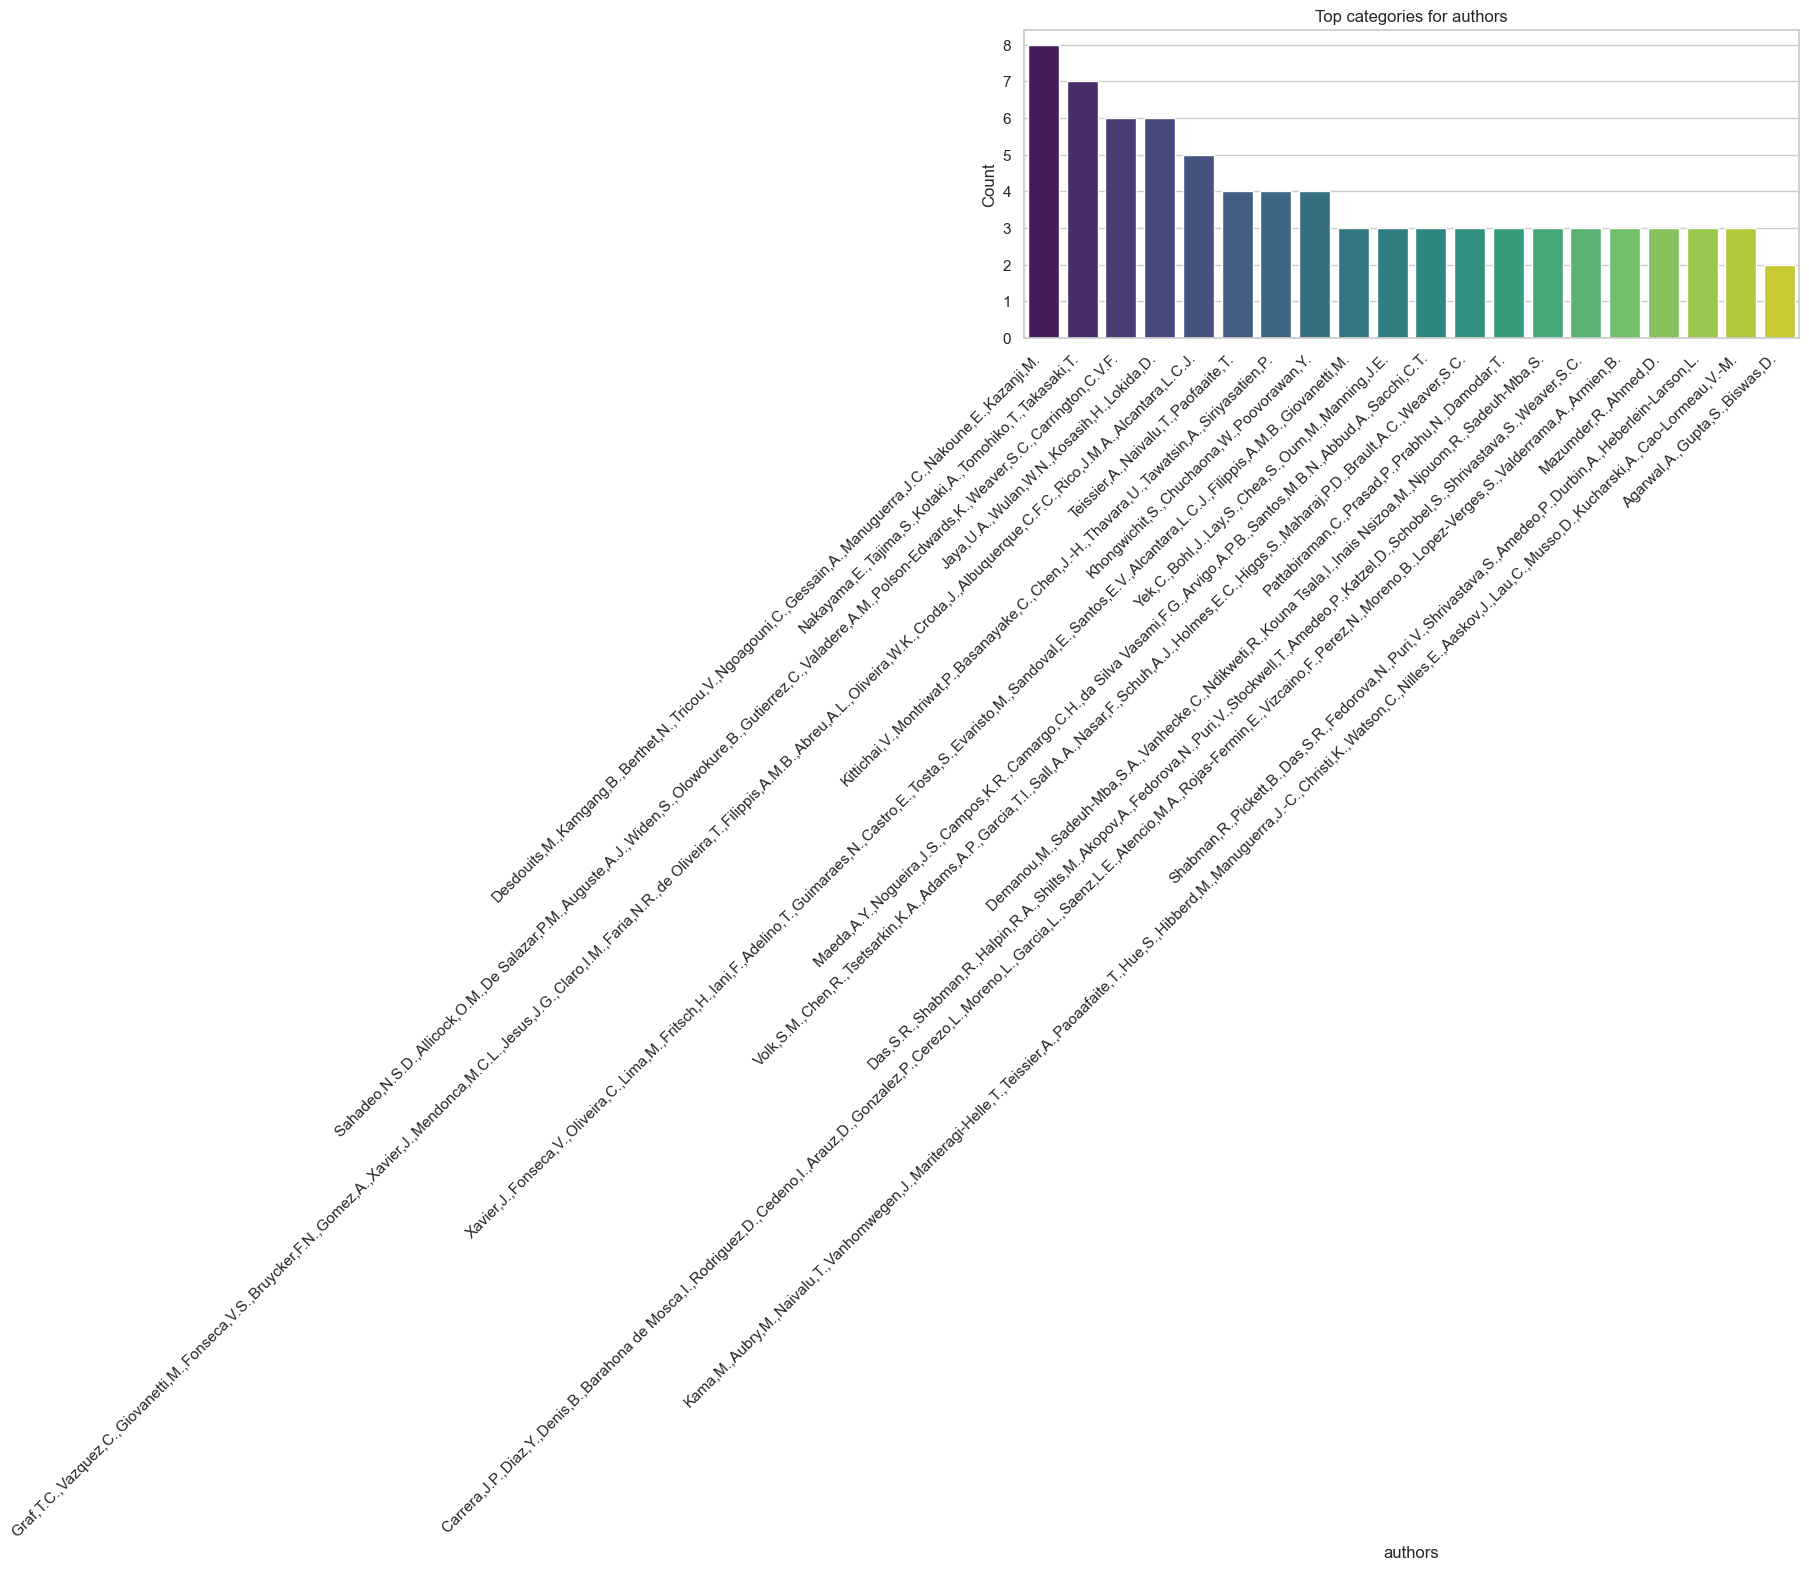

/var/folders/w0/pzdl0rq53pd7lqhw_k66lsv80000gn/T/ipykernel_82022/699295827.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=value_counts, x=col, y="count", palette="viridis")


                                         institution  count
0  Institut Louis Malarde, Unit of Emerging Infec...      8
1     Institut Pasteur de Bangui, Virlogy Department      8
2                          J. Craig Venter Institute      7
3  Virology I; 1-23-1 Toyama, Shinjuku, Tokyo 162...      7
4  The Indonesia Research Partnership on Infectio...      6


/var/folders/w0/pzdl0rq53pd7lqhw_k66lsv80000gn/T/ipykernel_82022/699295827.py:20: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


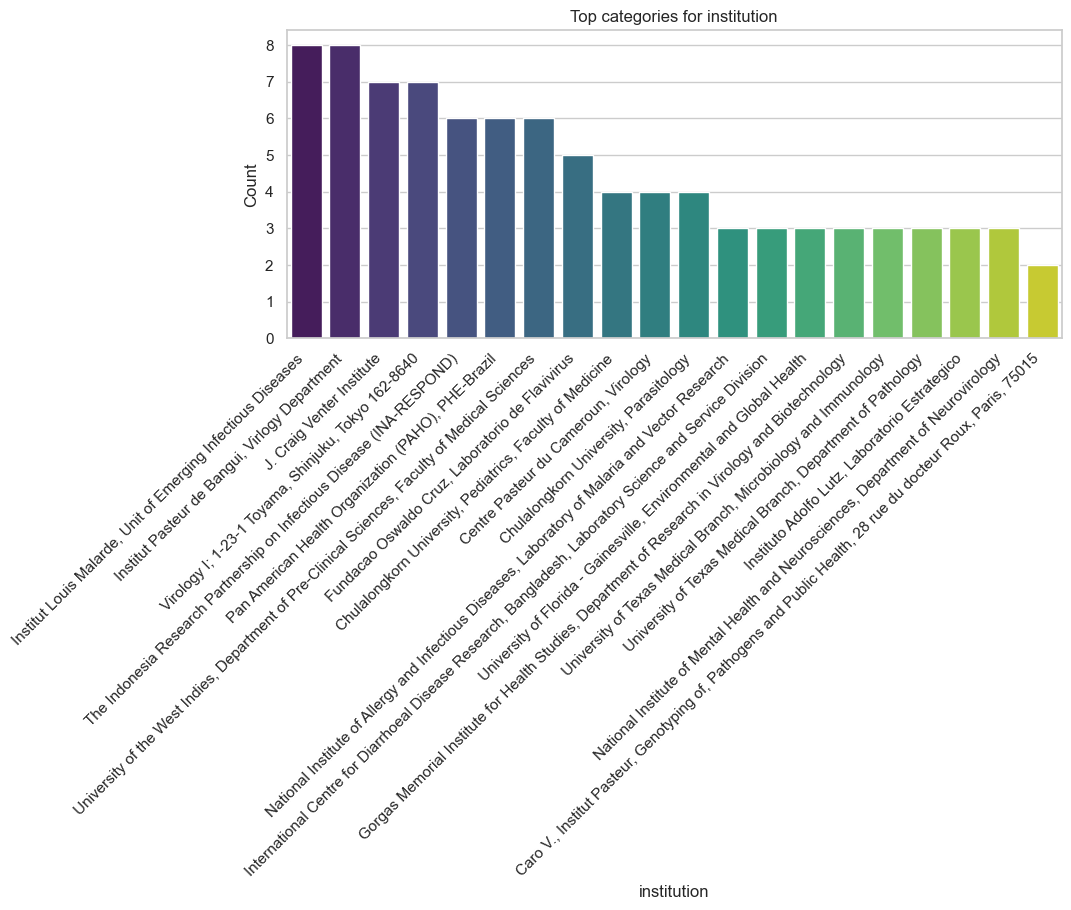

          clade  count
0       II-ECSA    117
1     III-Asian     63
2  I-WestAfrica      5
3       Missing      2


/var/folders/w0/pzdl0rq53pd7lqhw_k66lsv80000gn/T/ipykernel_82022/699295827.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=value_counts, x=col, y="count", palette="viridis")


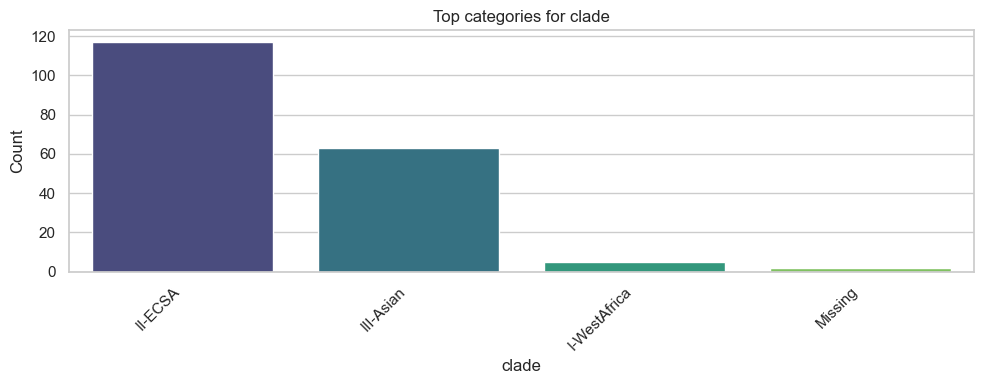

/var/folders/w0/pzdl0rq53pd7lqhw_k66lsv80000gn/T/ipykernel_82022/699295827.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=value_counts, x=col, y="count", palette="viridis")


  qc.overallStatus  count
0             good    177
1         mediocre      8
2          Missing      2


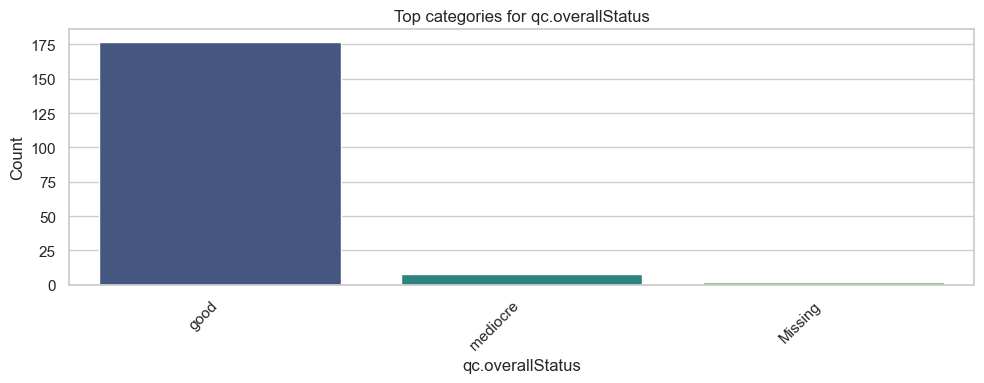

In [ ]:
categorical_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()
print(categorical_cols)
if categorical_cols:
    for col in categorical_cols:
        n_unique = df[col].nunique(dropna=False)
        n_total = len(df[col])

        # Skip if every value is unique
        if n_unique == n_total:
            print(f"Skipping {col} (all values unique)")
            continue
        
        value_counts = (
            df[col]
            .fillna("Missing")
            .value_counts()
            .head(20)
            .reset_index()
        )
        value_counts.columns = [col, "count"]
        print(value_counts.head())
        plt.figure(figsize=(10, 4))
        sns.barplot(data=value_counts, x=col, y="count", palette="viridis")
        plt.title(f"Top categories for {col}")
        plt.ylabel("Count")
        plt.xlabel(col)
        plt.xticks(rotation=45, ha="right")
        plt.tight_layout()
        plt.show()
else:
    print("No categorical columns found.")
